# ML-8. Ансамблирование. Бэггинг, стекинг, бустинг

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

**Загрузка данных**

In [2]:
data = load_diabetes(as_frame=True)
X = data['frame']
y = data['target']

In [3]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


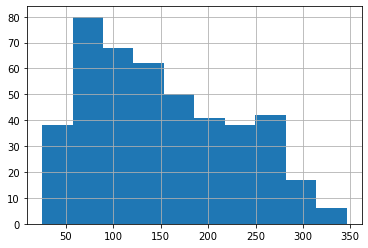

In [4]:
y.hist();

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [6]:
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')

Размерность обучающей выборки (296, 11)
Размерность тестовой выборки (146, 11)


## Бэггинг: случайный лес. 


In [13]:
regr1 = DecisionTreeRegressor(max_depth=1000, random_state=42)
regr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1000, random_state=42)

In [14]:
regr2 = RandomForestRegressor(max_depth=1000,n_estimators=10, random_state=42)
regr2.fit(X_train, y_train)

RandomForestRegressor(max_depth=1000, n_estimators=10, random_state=42)

In [15]:
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)

print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

Качество предсказания по MSE для решающего дерева 4.06
Качество предсказания по MSE для случайного леса  1.84


 ## Стекинг

In [16]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

In [24]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
#Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('dt', DecisionTreeRegressor(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [25]:
y_pred_stack = reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack),2)}')

Качество предсказания по MSE для стекинга 0.82


In [19]:
meta_data = reg.transform(X_train)
#Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2',] #название столбцов
)
meta_df.head()


,meta_feature1,meta_feature2
0,154.000000,154.0
1,192.000001,192.0
2,116.000002,116.0
3,81.000007,81.0
4,122.000005,122.0


In [26]:
from sklearn.linear_model import LinearRegression
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('rl',  LinearRegression())
]

#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100, 
                                          max_depth=10,
                                          random_state=42)
)

#Обучаем модель
reg.fit(X_train, y_train)
y_pred_stack = reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack),1)}')

Качество предсказания по MSE для стекинга 0.3


 ## Бустинг
 



### Адаптивный бустинг

In [27]:
from sklearn.ensemble import AdaBoostRegressor

dt = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42
)

ada = AdaBoostRegressor(
    base_estimator=dt,
    random_state=42, 
    n_estimators=10
)
ada.fit(X_train, y_train)

ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')


Качество предсказания по MSE для AdaBoost 40.5


/home/aubakirov/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [29]:
dt = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42
)

ada = AdaBoostRegressor(
    base_estimator=dt,
    random_state=42, 
    n_estimators=100
)
ada.fit(X_train, y_train)

ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')

Качество предсказания по MSE для AdaBoost 10.15


/home/aubakirov/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Градиентный бустинг (регрессия)

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(
    max_depth=3,
    n_estimators=100,
    random_state=42 
)
gb.fit(X_train, y_train)

gb_pred  = gb.predict(X_test)

print(f'Качество предсказания по MSE для GradientBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')

Качество предсказания по MSE для GradientBoostingRegressor 0.77


### Градиентный бустинг (классификация)

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [35]:
df =pd.read_csv('winequality-red.zip', sep = ';')

In [36]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
X = df.drop(['quality'],axis = 1)
y = (df['quality'] >5).astype(int)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [44]:
gb = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.2, #темп обучения
    n_estimators=500, #число деревьев
    min_samples_leaf=10,
    max_depth=3, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))

/home/aubakirov/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.76      0.77       238
           1       0.81      0.83      0.82       290

    accuracy                           0.80       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.80      0.80      0.80       528



In [40]:
gb.predict_proba(X_test)

array([[0.7575177 , 0.2424823 ],
       [0.81931477, 0.18068523],
       [0.80325657, 0.19674343],
       ...,
       [0.0212709 , 0.9787291 ],
       [0.90355559, 0.09644441],
       [0.80946194, 0.19053806]])